# Setting up

In [1]:
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
import os
GITHUB_KEY = os.getenv("GITHUB_KEY")

# Getting data from Github

In [3]:
import requests

def run_query(query): # A simple function to use requests.post to make the API call. Note the json= section.
    request = requests.post('https://api.github.com/graphql', json={'query': query}, headers=headers)
    if request.status_code == 200:
        return request.json()
    else:
        raise Exception("Query failed to run by returning code of {}. {}".format(request.status_code, query))

headers = {"Authorization": "Bearer "+ GITHUB_KEY}
query = """
{
  user(login: "mik4el") {
    repositories(first: 100) {
      nodes {
        name
        createdAt
      }
    }
  }
}
"""        

result = run_query(query)
print(result)

{'data': {'user': {'repositories': {'nodes': [{'name': 'Hello-World', 'createdAt': '2011-11-14T22:56:50Z'}, {'name': 'collectably-backend', 'createdAt': '2013-05-20T10:22:39Z'}, {'name': 'collectably-angular', 'createdAt': '2013-05-20T10:32:39Z'}, {'name': 'gadget-pi-tower-lamp', 'createdAt': '2014-06-13T19:34:53Z'}, {'name': 'mikael_och_maria_se', 'createdAt': '2014-06-13T19:45:05Z'}, {'name': 'wordpress_bootstrap_se_fabric', 'createdAt': '2014-06-14T10:12:47Z'}, {'name': 'next_bus_ekensberg', 'createdAt': '2015-02-07T20:50:31Z'}, {'name': 'reg_ferm', 'createdAt': '2015-04-30T09:25:38Z'}, {'name': 'gadget-circadian-hallway', 'createdAt': '2015-08-30T14:04:09Z'}, {'name': 'rufs', 'createdAt': '2015-12-06T08:57:51Z'}, {'name': 'thinkster-django-angular-boilerplate', 'createdAt': '2016-04-29T12:49:57Z'}, {'name': 'angular2_test', 'createdAt': '2016-05-03T08:08:26Z'}, {'name': 'dockerizing-django', 'createdAt': '2016-05-12T08:32:51Z'}, {'name': 'gadget-board', 'createdAt': '2016-05-17T08:

# Importing to Pandas and plotting

In [4]:
import pandas as pd
df = pd.DataFrame.from_dict(result["data"]["user"]["repositories"]["nodes"])
df.dtypes

name         object
createdAt    object
dtype: object

In [5]:
df["createdAt"] = (pd.to_datetime(df.createdAt, infer_datetime_format=True))

In [6]:
df.dtypes

name                 object
createdAt    datetime64[ns]
dtype: object

In [7]:
df

,name,createdAt
0,Hello-World,2011-11-14 22:56:50
1,collectably-backend,2013-05-20 10:22:39
2,collectably-angular,2013-05-20 10:32:39
3,gadget-pi-tower-lamp,2014-06-13 19:34:53
4,mikael_och_maria_se,2014-06-13 19:45:05
5,wordpress_bootstrap_se_fabric,2014-06-14 10:12:47
6,next_bus_ekensberg,2015-02-07 20:50:31
7,reg_ferm,2015-04-30 09:25:38
8,gadget-circadian-hallway,2015-08-30 14:04:09
9,rufs,2015-12-06 08:57:51


In [8]:
from matplotlib import pyplot as plt
df.plot()

In [9]:
df["total_repos"] = df.index

In [10]:
print(df)

                                    name           createdAt  total_repos
0                            Hello-World 2011-11-14 22:56:50            0
1                    collectably-backend 2013-05-20 10:22:39            1
2                    collectably-angular 2013-05-20 10:32:39            2
3                   gadget-pi-tower-lamp 2014-06-13 19:34:53            3
4                    mikael_och_maria_se 2014-06-13 19:45:05            4
5          wordpress_bootstrap_se_fabric 2014-06-14 10:12:47            5
6                     next_bus_ekensberg 2015-02-07 20:50:31            6
7                               reg_ferm 2015-04-30 09:25:38            7
8               gadget-circadian-hallway 2015-08-30 14:04:09            8
9                                   rufs 2015-12-06 08:57:51            9
10  thinkster-django-angular-boilerplate 2016-04-29 12:49:57           10
11                         angular2_test 2016-05-03 08:08:26           11
12                    dockerizing-djan

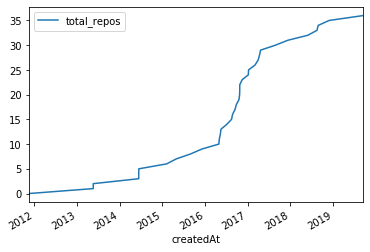

In [11]:
df.plot(x="createdAt", y="total_repos")